In [3]:
"""
A simple example demonstrating how a KAN might uncover a physical relationship like E_p = m g h

"""

import numpy as np
import torch
from kan import KAN
import matplotlib.pyplot as plt

# Generate synthetic data for gravitational potential energy
np.random.seed(42)
m = 2.0  # mass in kg (fixed)
g = 9.81  # gravitational acceleration in m/s^2 (fixed)
h = np.linspace(0, 10, 100).reshape(-1, 1)  # height from 0 to 10 meters
U = m * g * h  # potential energy in joules

# Convert to PyTorch tensors
h_tensor = torch.tensor(h, dtype=torch.float32)
U_tensor = torch.tensor(U, dtype=torch.float32)

# Initialize KAN with a simple architecture: 1 input (h), 2 hidden nodes, 1 output (U)
model = KAN(width=[1, 2, 1], grid=5, k=3, seed=42)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

# Train the model
model.train()
for epoch in range(1000):  # Increased epochs for better convergence
    optimizer.zero_grad()
    U_pred = model(h_tensor)
    loss = loss_fn(U_pred, U_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()  # Set to evaluation mode
U_pred = model(h_tensor)



checkpoint directory created: ./model
saving model version 0.0
Epoch 0, Loss: 13143.7676
Epoch 50, Loss: 12506.1250
Epoch 100, Loss: 10744.3965
Epoch 150, Loss: 7504.0737
Epoch 200, Loss: 3979.0874
Epoch 250, Loss: 1490.2870
Epoch 300, Loss: 367.4529
Epoch 350, Loss: 64.0273
Epoch 400, Loss: 13.6843
Epoch 450, Loss: 4.3726
Epoch 500, Loss: 2.6811
Epoch 550, Loss: 2.2180
Epoch 600, Loss: 1.9348
Epoch 650, Loss: 1.7154
Epoch 700, Loss: 1.5285
Epoch 750, Loss: 1.3633
Epoch 800, Loss: 1.2150
Epoch 850, Loss: 1.0813
Epoch 900, Loss: 0.9608
Epoch 950, Loss: 0.8523


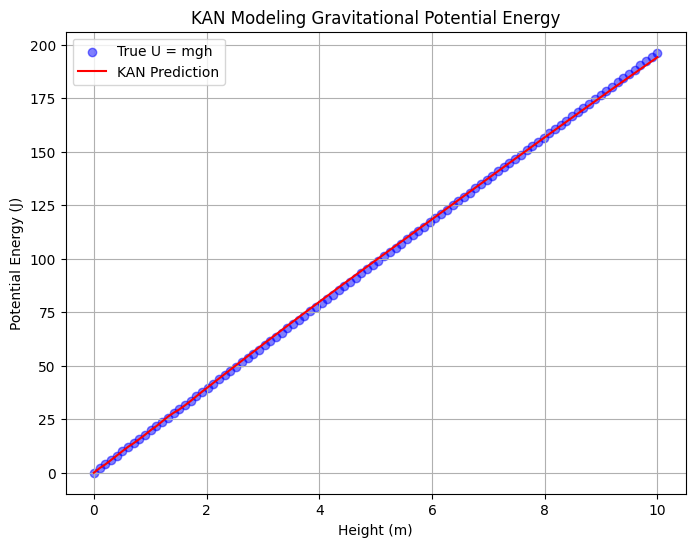

fixing (0,0,0) with x, r2=0.9941809177398682, c=1
fixing (0,0,1) with 0, r2=0.0, c=0
fixing (1,0,0) with x, r2=0.999918520450592, c=1
fixing (1,1,0) with x, r2=0.9924654960632324, c=1
saving model version 0.1
Symbolic formula discovered by KAN:
18.1856857970466*x_1 + 7.39063557794822


In [4]:
# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(h, U, label="True U = mgh", color="blue", alpha=0.5)
plt.plot(h, U_pred.detach().numpy(), label="KAN Prediction", color="red")
plt.xlabel("Height (m)")
plt.ylabel("Potential Energy (J)")
plt.title("KAN Modeling Gravitational Potential Energy")
plt.legend()
plt.grid(True)
plt.show()

# Symbolic regression to "discover" the relationship
model.auto_symbolic()
print("Symbolic formula discovered by KAN:")
formula, variables = model.symbolic_formula()
print(formula[0])  # Outputs an approximate symbolic expression